# VGG Net 응용
- 참고: https://bskyvision.com/504, https://antilibrary.org/1998
- PIL과 opencv 참고: https://ecsimsw.tistory.com/entry/PIL-pillow-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EC%B2%98%EB%A6%AC, https://chacha95.github.io/2019-08-01-PIL-vs-OpenCV/, https://stackoverflow.com/questions/58861577/differences-between-pil-image-open-and-cv2-imdecode

In [1]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions

In [2]:
vgg16 = VGG16()
vgg16.summary()

553476096/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [3]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg19 = VGG19()
vgg19.summary()

574726144/574710816 [==============================] - 4s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [6]:
import numpy as np
from PIL import Image
from google.colab import files
up = files.upload()

Saving cat3.jpg to cat3.jpg


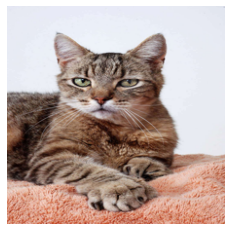

In [24]:
import matplotlib.pyplot as plt

img = Image.open('cat3.jpg').resize((224,224))
plt.imshow(img), plt.axis('off');

In [12]:
img = np.array(img.resize((224,224)))
img.shape

(224, 224, 3)

- 이미지 예측

In [14]:
yhat = vgg16.predict(np.array(img).reshape(-1,224,224,3))
label = decode_predictions(yhat)
yhat.shape, label

((1, 1000),
 [[('n02123045', 'tabby', 0.6021796),
   ('n02123159', 'tiger_cat', 0.28284538),
   ('n02124075', 'Egyptian_cat', 0.10634181),
   ('n02127052', 'lynx', 0.007124994),
   ('n02123394', 'Persian_cat', 0.00025673435)]])

In [15]:
label[0][0][1], label[0][0][2] 

('tabby', 0.6021796)

In [16]:
yhat = vgg19.predict(np.array(img).reshape(-1,224,224,3))
label = decode_predictions(yhat)
label[0][0][1], label[0][0][2] 

('tabby', 0.85725665)

- 이미지를 224 x 224 사이즈로 자르기

In [19]:
img = Image.open('cat3.jpg')
h, w, _ = np.array(img).shape
h, w

(1600, 1071)

In [21]:
if h > w:
    width, height = 224, (h * 224) // w
else:
    width, height = (w * 224) // h, 224
height, width

(334, 224)

In [27]:
new_img = np.array(img.resize((width, height)))
new_img.shape

(334, 224, 3)

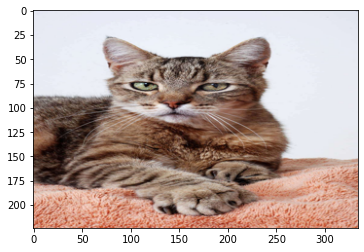

In [26]:
plt.imshow(new_img);

In [30]:
diff = abs(width - height) // 2
if width > height:
    final_img = new_img[:, diff:diff+224, :]
else:
    final_img = new_img[diff:diff+224, :, :]
final_img.shape

(224, 224, 3)

In [38]:
# abs() 참고: https://yongku.tistory.com/1892
IMAGE_SIZE = 224

def center_image(img):
    h, w, _ = np.array(img).shape
    if h > w:
        width, height = IMAGE_SIZE, (h * IMAGE_SIZE) // w
    else:
        width, height = (w * IMAGE_SIZE) // h, IMAGE_SIZE
    
    new_img = np.array(img.resize((width, height)))

    diff = abs(width - height) // 2
    if width > height:
        final_img = new_img[:, diff:diff+IMAGE_SIZE, :]
    else:
        final_img = new_img[diff:diff+IMAGE_SIZE, :, :]

    return final_img

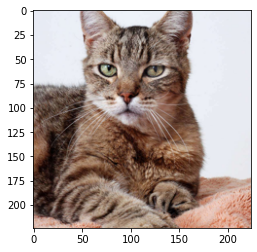

In [39]:
img = Image.open('cat3.jpg')
img2 = center_image(img)
plt.imshow(img2);

In [40]:
yhat = vgg16.predict(np.array(img2).reshape(-1,224,224,3))
label = decode_predictions(yhat)        # 1000개의 class중, 주어진 사진에서 제일 높은 확률 5개를 출력해서 보여줌
label[0][0][1], label[0][0][2]

('tabby', 0.5763569)

In [41]:
yhat = vgg19.predict(np.array(img2).reshape(-1,224,224,3))
label = decode_predictions(yhat)
label[0][0][1], label[0][0][2]

('tabby', 0.84263825)